Higher order: Taylor’s series
-----------------------------

We can go a step beyond Euler’s method keeping up to second order terms
in the expansion around $x_0$. Doing so we obtain
$$y(x+\Delta x)=y(x)+y'(x)\Delta x+\frac{1}{2}y''(x)(\Delta x)^2+O(\Delta 
x^3)
$$ from the ODE we get $$\begin{eqnarray}
y'(x)&=&f(x,y), \\
y''(x)&=&\frac{df}{dx}=\frac{\partial f}{\partial x}+\frac{\partial 
f}{\partial y}\frac{dy}{dx}=\frac{\partial f}{\partial 
x}+\frac{\partial f}{\partial y} f \end{eqnarray}$$

Substituting in the Taylor expansion we obtain

$$y_{n+1}=y_n+f\Delta x+\frac{1}{2}(\Delta x)^2[\frac{\partial 
f}{\partial x}+f\frac{\partial f}{\partial y}]+O(\Delta x^3),$$

where all the functions and derivatives are evaluated in $(x_n,y_n)$.

Multistep or Predictor-Corrector methods
----------------------------------------

We can achieve higher accuracy by relating $y_{n+1}$ not only to $y_n$,
but also to points further in the past $y_{n-1},y_{n-2},...$ To derive
such formulas we can formally integrate exactly the equation of motion to obtain:
$$y_{n+1}=y_n+\int_{x_n}^{x_{n+1}}f(x,y)dx$$

The problem is that we don’t know $f(x,y)$ over the interval
$(x_n,x_{n+1})$. However, we can use the values of $y$ at $x_n$ and
$x_{n-1}$ to provide a linear extrapolation:
$$f=\frac{(x-x_{n-1})}{\Delta x}f_n-\frac{(x-x_n)}{\Delta x} 
f_{n-1}+O(\Delta x^2),$$ with $f_n=f(x_n,y_n)$. Inserting into
the integral we obtain
$$y_{n+1}=y_n+\Delta x(\frac{3}{2}f_n-\frac{1}{2}f_{n-1})+O(\Delta x^3)$$
Note that the value of $y_0$ is not sufficient information to get this
algorithm started. The value of $y_1$ has to be obtained first by some
other procedure, like the ones described previously. This means that the
method is not **"self starting"**.

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Challenge 1.2

Repeat the calculation in Challenge 1.1 using 4th order Runge-Kutta

In [1]:
def rk(t, y, f, ys, r, dt):
        k1 = dt * f(t, y, ys, r)
        k2 = dt * f(t + 0.5 * dt, y + k1 * 0.5, ys, r)
        k3 = dt * f(t + 0.5 * dt, y + k2 * 0.5, ys, r)
        k4 = dt * f(t + dt, y + k3, ys, r)        
        y = y + 1. / 6. * (k1 + 2 * k2 + 2 * k3 + k4) 
        return y

[ 82.81908728  82.81912347  82.81915965  82.81919584  82.81923202
  82.8192682   82.81925014  82.81934055  82.81926827  82.8194129 ]
[ 0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009  0.01 ]


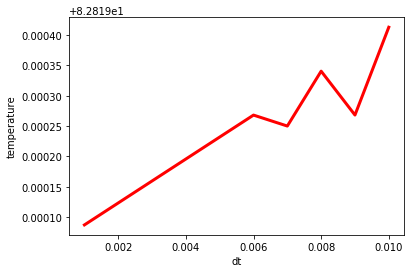

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot 

T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
tmax = 60. # maximum time

my_color = ['red', 'green', 'blue', 'black']
fun = lambda t, y, Ts, r: -r * (T - Ts) 
euler = lambda y, f, dx: y + f*dx 
my_temp = np.zeros(10)
my_dt = np.linspace(0.001, 0.01, 10)
my_time = 1.
j = 0
for dt in my_dt:
    nsteps = int(tmax/dt)  # number of steps
    
    T = T0
    for i in range(1,nsteps):
        T = rk(my_time, T, fun, Ts, r, dt)
        #T = euler(T, -r*(T-Ts), dt)
            
    my_temp[j] = T 
    j += 1
print my_temp
print my_dt
        
pyplot.plot(my_dt, my_temp, color=my_color[0], ls='-', lw=3)
pyplot.xlabel('dt');
pyplot.ylabel('temperature');
